# Oregon Wildlife - Image Classification Capstone - Baseline Modeling
## David Lappin
### BrainStation
#### 3/1/2023 -

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL 
from glob import glob
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization

In [2]:
#set local path to files for basic exploration

datapath = 'data/oregon_wildlife/' # This is the relative path to the data
image_files = os.listdir(datapath) #these are the individual folder names (the class names)

# Split data:

In [3]:
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

#Start
#train_data_path = 'F://data//Train'
#test_data_path = 'F://data//Validation'
img_height = 180
img_width = 180
epochs = 2
batch_size = 32
#num_of_train_samples = 3000
#num_of_test_samples = 600

#Image Generator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    datapath,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    datapath, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data




Found 10845 images belonging to 20 classes.
Found 2705 images belonging to 20 classes.


In [5]:

num_classes = 20
img_height = 180
img_width = 180

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(20, activation = 'softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size)

Epoch 1/2
 22/338 [>.............................] - ETA: 3:21 - loss: 2.9975 - accuracy: 0.0440

C:\Users\dlapp\anaconda3\envs\baseclone\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


338/338 [==============================] - 266s 784ms/step - loss: 2.9952 - accuracy: 0.0509 - val_loss: 2.9939 - val_accuracy: 0.0547
Epoch 2/2
338/338 [==============================] - 267s 790ms/step - loss: 2.9938 - accuracy: 0.0550 - val_loss: 2.9933 - val_accuracy: 0.0551


In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('data\\oregon_wildlife_test\\',
                                                  target_size=(img_height,img_width),
                                                  color_mode='rgb',
                                                  batch_size=400,
                                                  class_mode='categorical')

Found 400 images belonging to 20 classes.


In [7]:
list(train_generator.class_indices.keys())

['bald_eagle',
 'black_bear',
 'bobcat',
 'canada_lynx',
 'columbian_black-tailed_deer',
 'cougar',
 'coyote',
 'deer',
 'elk',
 'gray_fox',
 'gray_wolf',
 'mountain_beaver',
 'nutria',
 'raccoon',
 'raven',
 'red_fox',
 'ringtail',
 'sea_lions',
 'seals',
 'virginia_opossum']

confusion matrix and classification report from:

https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045

In [8]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_generator, test_generator.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
con_mat = confusion_matrix(test_generator.classes, y_pred)
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = list(train_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))
                
                
#Confution Matrix and Classification Report
#Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
#y_pred = np.argmax(Y_pred, axis=1)
#print('Confusion Matrix')
#print(confusion_matrix(validation_generator.classes, y_pred))
#print('Classification Report')
#target_names = ['Cats', 'Dogs', 'Horse']
#print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

C:\Users\dlapp\AppData\Local\Temp\ipykernel_26520\4095981115.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator, test_generator.samples // batch_size+1)


Confusion Matrix
[[ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0 

C:\Users\dlapp\anaconda3\envs\baseclone\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dlapp\anaconda3\envs\baseclone\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dlapp\anaconda3\envs\baseclone\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
normalized_conf_mat = con_mat / con_mat.sum(axis=1)

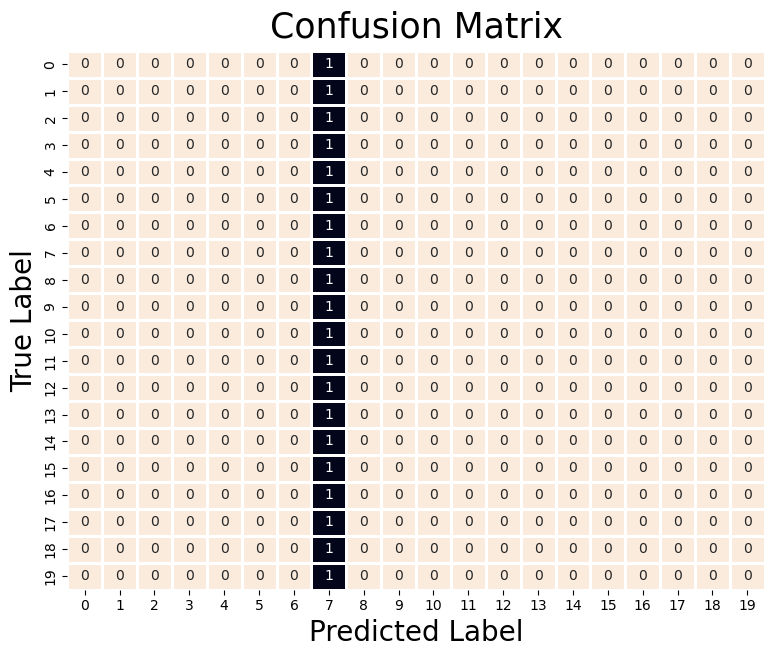

In [10]:
plt.figure(figsize = (9,7))
sns.heatmap(normalized_conf_mat,
            annot=True,
            cbar=False,
            cmap="rocket_r",
            linewidths=1
           )
plt.title('Confusion Matrix',size = 25,y=1.01)
plt.xlabel("Predicted Label", size = 20)
plt.ylabel("True Label", size = 20)
plt.show()